# Import the pandas library



In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Lenovo\Desktop\Lokesh pachauri-18 AIML Diabetes classification\diabetes.csv')
print(df)
print(df.columns)
print(df.isnull().sum())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# Visualization of dataset

In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




# Split data into train set and test set

In [3]:
from sklearn.model_selection import train_test_split
x=df.loc[:,['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=df.Outcome
print(x.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=12)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(768, 8)
(768,)
(154, 8)
(614, 8)
(154,)
(614,)


# Standard Scaler and Logistic Regression

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
std=StandardScaler()
std_train=std.fit_transform(x_train)
std_test=std.transform(x_test)
log=LogisticRegression()
log.fit(std_train,y_train)

LogisticRegression()

# Train accuracy

In [5]:
log.score(std_train,y_train)

0.7687296416938111

# Test accuracy

In [6]:
log.score(std_test,y_test)

0.8116883116883117

# KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(metric="euclidean",n_neighbors=12)
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

# Train accuracy

In [8]:
train_pred=knn.predict(x_train)
accuracy_score(y_train,train_pred)

0.7882736156351792

# Test accuracy

In [9]:
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.7337662337662337

# SVC

In [10]:
from sklearn.svm import SVC
clf=SVC(kernel='linear',C=.1)
clf.fit(x_train,y_train)

SVC(C=0.1, kernel='linear')

# Train accuracy

In [11]:
score=clf.score(x_train,y_train)
'train_score=',score

('train_score=', 0.7638436482084691)

# Test accuracy

In [12]:
score=clf.score(x_test,y_test)
'test_score=',score

('test_score=', 0.8051948051948052)

In [13]:
pred=clf.predict(x_test)
pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [14]:
import numpy as np
np.where(pred!=y_test)

(array([  6,   7,  17,  18,  20,  26,  27,  56,  57,  64,  79,  82,  83,
         86, 100, 104, 106, 107, 110, 121, 123, 126, 129, 130, 131, 135,
        136, 138, 147, 152], dtype=int64),)

# Visualization of data using matplotlib

<Figure size 864x576 with 0 Axes>

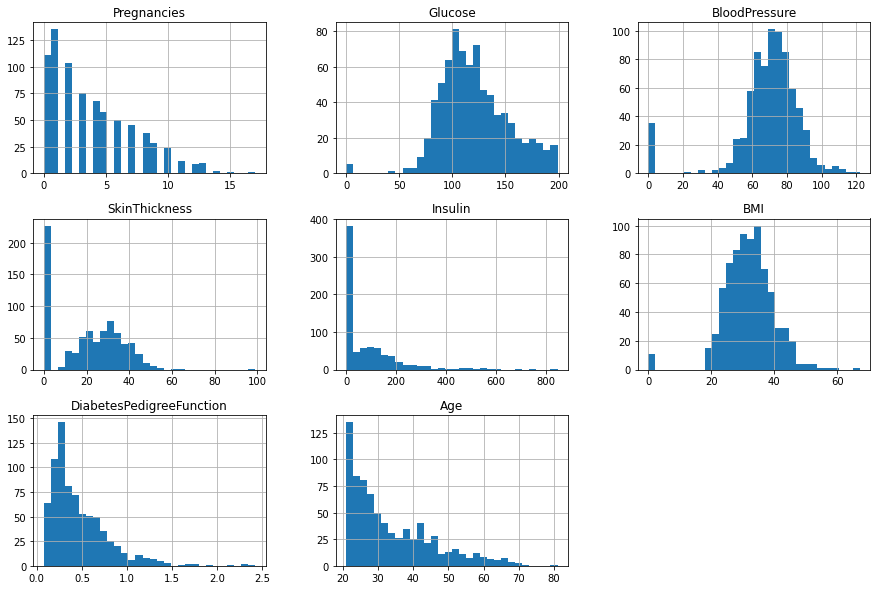

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
df.iloc[:,0:-1].hist(bins=30,figsize=(15,10))
plt.show()

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print(confusion_matrix(y_test,dtcpred))

[[85 14]
 [20 35]]


# Train accuracy

In [17]:
print('train score:',dtc.score(x_train,y_train))

train score: 1.0



# Test accuracy

In [18]:
print('test score:',dtc.score(x_test,y_test))

test score: 0.7792207792207793


# F1 score

In [19]:
print('f1 score:',f1_score(y_test,dtcpred))

f1 score: 0.673076923076923


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        99
           1       0.79      0.62      0.69        55

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154



# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=400)
rfc.fit(x_train,y_train)
rfcpred=rfc.predict(x_test)
print(confusion_matrix(y_test,rfcpred))

[[87 12]
 [19 36]]


# Train accuracy

In [22]:
print('rfc train score',rfc.score(x_train,y_train))

rfc train score 1.0


# Test accuracy

In [23]:
print('rfc test score',rfc.score(x_test,y_test))

rfc test score 0.7987012987012987


# F1 score

In [24]:
print('f1 score:',f1_score(y_test,rfcpred))

f1 score: 0.6990291262135923


In [25]:
f=rfc.feature_importances_
print('Pregnancies=',f[0],'\nGlucose=',f[1],'\nBloodPressure=',f[2],'\nSkinThickness=',f[3],'\nInsulin=',f[4],'\nBMI=',f[5],'\nDiabetesPedigreeFunction=',f[6],'\nAge=',f[7])


Pregnancies= 0.08313741279789433 
Glucose= 0.2520301735485363 
BloodPressure= 0.09207330456103001 
SkinThickness= 0.07041572007212592 
Insulin= 0.07962326959941585 
BMI= 0.15955228770952198 
DiabetesPedigreeFunction= 0.1296212368170164 
Age= 0.13354659489445933


# Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nbpred=nb.predict(x_test)
print('number of missclassified:',(y_test!=nbpred).sum(),'out of',x_test.shape[0])
print(confusion_matrix(y_test,nbpred))

number of missclassified: 32 out of 154
[[89 10]
 [22 33]]


# Train accuracy

In [27]:
print('train score:',nb.score(x_train,y_train))

train score: 0.754071661237785


# Test accuarcy

In [28]:
print('test score:',nb.score(x_test,y_test))

test score: 0.7922077922077922


# F1 score

In [29]:
print('f1 score:',f1_score(y_test,nbpred))

f1 score: 0.673469387755102


In [30]:
prediction=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.8051948051948052


# Prediction of outcome 

In [31]:
import numpy as np
X1_new=np.array([[6,148,72,35,0,33.6,0.627,50]]) # give input the values
pred=clf.predict(X1_new)
print('prediction of outcome: {}'.format(pred)) # predict output in 0 or 1
               

prediction of outcome: [1]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
